<a href="https://colab.research.google.com/github/adwiza/datascience_netology/blob/main/parabola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# Пример линейная регрессия

Подбираем коэффициенты квадратного уравнения: $y = w1 * x^2 + w2 * x +w3$

# Входные переменные и параметры модели

In [3]:
# tf.placeholder позволяем передавать данные из python в Tensonrflow
# с помощью tf.placeholder мы передаем данные для обучение
x = tf.placeholder(tf.float32, shape=[None], name='x')
y = tf.placeholder(tf.float32, shape=[None], name='y')

In [4]:
# иницивлизируем переменную w
# повторная инициализация приводит к ошибке ??

with tf.variable_scope("myscope", reuse=tf.AUTO_REUSE) as scope:
  w = tf.get_variable('w', shape=[3, 1],
                      initializer = tf.constant_initializer([3, 3, 3]))

In [5]:
w.name

'myscope/w:0'

# Модель и функция потерь

In [8]:
# задаем модель с помощью операций
f = tf.stack([tf.square(x), x, tf.ones_like(x)], 1)
yhat = tf.squeeze(tf.matmul(f, w), 1)

In [9]:
# задаем квадратичную функцию потерь
loss = tf.nn.l2_loss(yhat - y) + .1 * tf.nn.l2_loss(w)

In [10]:
loss

<tf.Tensor 'add:0' shape=() dtype=float32>

In [12]:
# инициализируем оптимизатор для подбора параметров модели
optimizer = tf.train.AdamOptimizer(learning_rate=.1)
train_op = optimizer.minimize(loss)

# Обучение

In [13]:
# генератор данных
def generate_data(batch_size=100):
  x_val = np.random.uniform(-10.0, 10.0, size=batch_size)
  y_val = 5 * np.square(x_val) + 3 * x_val + np.random.normal()
  return x_val, y_val

In [20]:
loss_vals = []

# Иницивлизируем сессию
with tf.Session() as sess:
  # инициализируем переменные (параметры модели)
  sess.run(tf.global_variables_initializer())
  # запускаем обучение
  for i in range(100):
    # генерируем случайный набор данных
    x_val, y_val = generate_data(batch_size=100)
    # выполняем операции на заданном семпле
    _, loss_val = sess.run([train_op, loss], 
                           feed_dict = {x: x_val,
                                        y: y_val})
    loss_vals.append(loss_val)
    if i % 10 == 0:
      print('%03d\t5%s' % (i, loss_val))
  
  print('weights: %s' % sess.run([w])) # выводим веса
  print('weights: %s' % w.eval()) # выводим веса

000	5338793.84
010	586648.266
020	52873.7334
030	56849.8315
040	54322.951
050	51139.3494
060	5939.58997
070	5556.8302
080	5227.26025
090	5670.27844
weights: [array([[4.9307227],
       [2.9794214],
       [4.1969323]], dtype=float32)]
weights: [[4.9307227]
 [2.9794214]
 [4.1969323]]


Text(0, 0.5, 'mse')

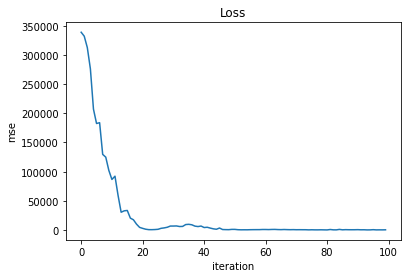

In [22]:
  %matplotlib inline
  from matplotlib import pyplot as plt
  plt.plot(loss_vals[:100])
  plt.title('Loss')
  plt.xlabel('iteration')
  plt.ylabel('mse') 

# Визуализация графа

In [23]:
with tf.Session() as sess:
  writer = tf.summary.FileWriter('log/001', sess.graph)
  writer.close()

In [24]:
!ls ./log/001/

events.out.tfevents.1668396808.39f8cd6726a2


In [25]:
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# ! tensorboard --logdir ./log/001 --host 0.0.0.0 --port 8898